# Exploratory Data Analysis (EDA)

## Introducción
Este análisis exploratorio tiene como objetivo comprender mejor la distribución de las variables clave en los datos, así como las relaciones entre ellas. Esto nos permitirá tomar decisiones informadas en las etapas posteriores del proyecto.


## 1. Cargar Librerías y Datos


In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm



## 2. Configuración del Entorno

In [2]:
# Configuración de opciones de pandas
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

# Configuración de estilo para las visualizaciones
sns.set(style="whitegrid")

# Configuración para reproducibilidad
np.random.seed(42)

data_dir = '../data/'
models_dir = '../models/'


## 3. Carga de Datos


In [3]:
# Cargar los datasets de transacciones
df = pd.read_excel(f'{data_dir}db_.xlsx', 'BBDD')
df.shape

(92212, 6)

In [4]:
df.head(3)

,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced
0,2020-11-05,2020-12-04,2020-11-29,Consumo Basico,6,1190000.0000
1,2020-11-05,2020-12-04,2020-11-15,Ganadería,6,120987.0000
2,2020-11-05,2020-12-04,2020-11-15,Ganadería,6,299285.0000


## 4. Análisis Descriptivo de los Datos

In [5]:
df.info()
# contiene null paymentdate,sector y amountfinanced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92212 entries, 0 to 92211
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               92212 non-null  datetime64[ns]
 1   expirationDate     92212 non-null  datetime64[ns]
 2   paymentDate        84946 non-null  datetime64[ns]
 3   sector             90543 non-null  object        
 4   payerSalesSegment  92212 non-null  int64         
 5   amountFinanced     92210 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,92212,2021-09-02 03:48:08.214115584,2020-11-05 00:00:00,2021-05-06 00:00:00,2021-09-10 00:00:00,2022-01-02 00:00:00,2022-05-28 00:00:00,NaN
expirationDate,92212,2021-10-12 17:55:25.467401216,2020-11-15 00:00:00,2021-06-15 00:00:00,2021-10-18 00:00:00,2022-02-13 00:00:00,2022-10-10 00:00:00,NaN
paymentDate,84946,2021-09-25 20:42:09.230334720,2020-09-04 00:00:00,2021-06-05 00:00:00,2021-10-14 00:00:00,2022-01-15 00:00:00,2022-05-28 00:00:00,NaN
payerSalesSegment,92212.0000,5.1003,1.0000,5.0000,5.0000,6.0000,6.0000,0.8777
amountFinanced,92210.0000,5462066.3549,0.0000,198361.0000,641410.0000,2790387.7500,4181266120.0000,33269269.6644


In [ ]:
## contiene duplicados, pero tambien podrian ser igual facturas . 
df.drop_duplicates().shape,df.shape

((80779, 6), (92212, 6))

In [15]:
df_sin_duplicados=df.groupby(df.columns.to_list()).size().reset_index()
df_sin_duplicados.head()

,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced,0
0,2020-11-05,2020-11-15,2020-11-15,Ganadería,6,3234453.0000,1
1,2020-11-05,2020-11-15,2020-11-15,Ganadería,6,25284207.0000,1
2,2020-11-05,2020-11-15,2020-11-15,Ganadería,6,60265686.0000,1
3,2020-11-05,2020-11-20,2020-11-20,Ganadería,6,380800.0000,1
4,2020-11-05,2020-11-20,2020-11-20,Ganadería,6,6792520.0000,1


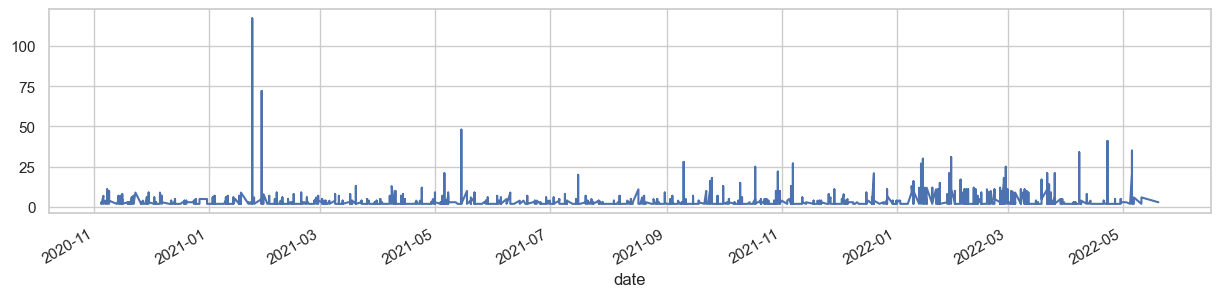

In [20]:
plt.figure(figsize=(15, 3))
df_sin_duplicados[df_sin_duplicados[0]>1].set_index('date')[0].plot()
plt.show()

In [ ]:
# Se va considerar que si bien las facturas son duplicadas es un comportamiento normal  

### Analisis Univariado Y Bivaridado

### payerSalesSegment

In [21]:
df['payerSalesSegment'].value_counts(1,dropna=False).sort_index(ascending=False)

payerSalesSegment
6   0.2999
5   0.5974
4   0.0379
3   0.0439
2   0.0096
1   0.0113
Name: proportion, dtype: float64

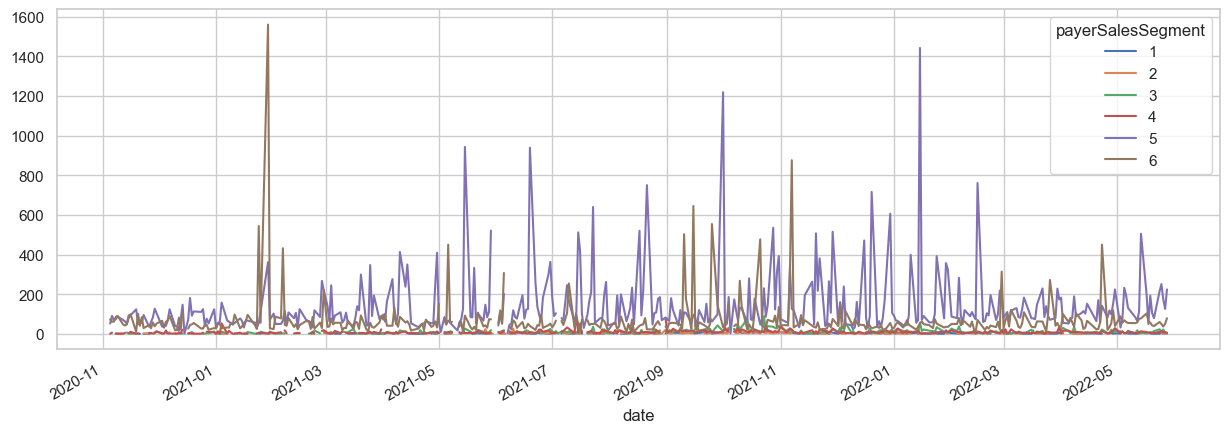

In [31]:
df.pivot_table(columns='payerSalesSegment',
               index='date',
               aggfunc='size').plot(figsize=(15, 5))
plt.show()

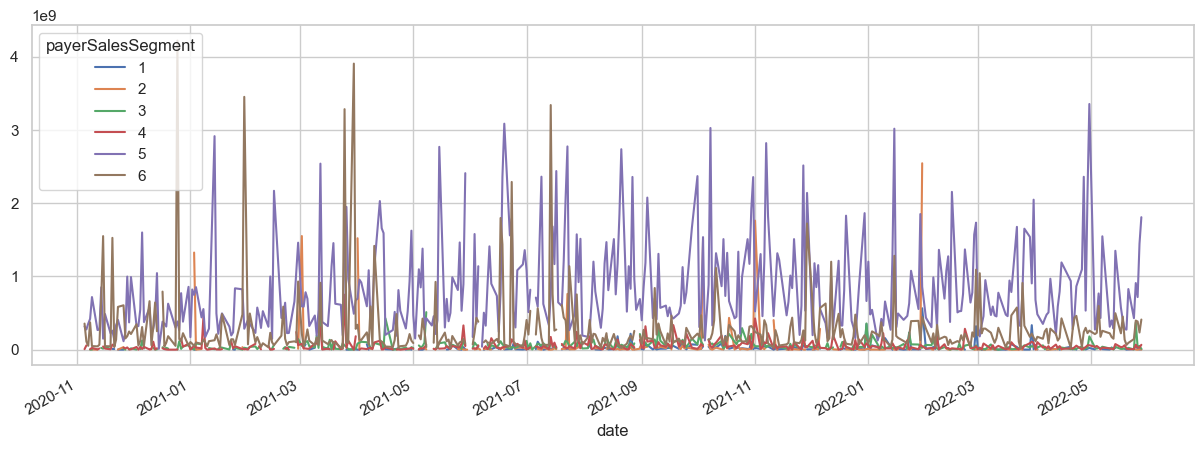

In [29]:
df.pivot_table(columns='payerSalesSegment',
               index='date',
               values='amountFinanced',
               aggfunc='sum').plot(figsize=(15, 5))
plt.show()

In [ ]:
df.groupby('payerSalesSegment')['amountFinanced'].describe(percentiles=[0.05,0.5,0.95]).T

payerSalesSegment,1,2,3,4,5,6
count,1038.00,888.00,4052.00,3493.00,55081.00,27658.00
mean,8231308.20,16692485.84,5114768.24,5526184.25,5946253.37,4076091.15
std,31864448.62,145792448.99,16291149.19,16524137.21,21861710.59,44029088.62
min,3278.00,0.00,0.00,903.00,0.00,0.00
5%,89243.20,40838.40,47074.90,67830.00,40976.00,45599.00
50%,1459539.00,911352.00,1146474.50,1190000.00,832052.00,353052.00
95%,27907125.00,17708747.00,21352997.05,22080844.60,25921951.00,13134568.90
max,551875136.00,2545222228.00,464636546.00,407986740.00,1260513617.00,4181266120.00


In [ ]:
## se aprecia valores extremos para cada segmentos
## con respecto size el segmento 5 y 6 tiene unos picos 
## con respecto a suma de amountFinanced no se observa nada raro 

### sector

In [34]:
df['sector'].unique()

array(['Ganadería', 'Consumo Basico', 'Acuicultura y Pesca',
       'Construcción de Viviendas', 'Retail', 'Energía',
       'Telecomunicaciones', 'Mercados de Capitales', 'Servicios',
       'Comercio', 'Relacionados a Construccion', 'Quimicos y Maderas',
       'Maquinaria y Equipo', 'Educación', 'Transporte',
       'Industria Automotriz', nan, 'Hoteles, Restaurantes y Ocio',
       'Construcción Ingeniería e Infraestructura', 'Seguros e Isapres',
       'Envíos y Almacenamiento', 'Suministro de Agua',
       'Servicios de Salud', 'Minería y Metales',
       'Gobierno y Actividades Sociales', 'Agricultura y Relacionados',
       'Tecnología de la Información',
       'Laboratorios y Fabricación Productos Farmacéuticos', 'Aerolíneas',
       'Medios de Comunicación', 'Combustibles y Gas', 'Tabaco'],
      dtype=object)

In [33]:
df['sector'].value_counts(1,dropna=False).sort_values(ascending=False)*100

sector
Retail                                               17.8968
Construcción Ingeniería e Infraestructura            13.4668
Seguros e Isapres                                    12.6871
Ganadería                                            11.6362
Acuicultura y Pesca                                   7.7224
Consumo Basico                                        6.8473
Quimicos y Maderas                                    3.7056
Comercio                                              3.5191
Construcción de Viviendas                             3.1612
Minería y Metales                                     2.5919
Envíos y Almacenamiento                               1.9466
NaN                                                   1.8100
Agricultura y Relacionados                            1.7265
Relacionados a Construccion                           1.6267
Hoteles, Restaurantes y Ocio                          1.5638
Maquinaria y Equipo                                   1.4304
Servicios        

In [35]:
df.groupby('sector')['amountFinanced'].describe(percentiles=[0.05,0.5,0.95]).T

sector,Acuicultura y Pesca,Aerolíneas,Agricultura y Relacionados,Combustibles y Gas,Comercio,Construcción Ingeniería e Infraestructura,Construcción de Viviendas,Consumo Basico,Educación,Energía,Envíos y Almacenamiento,Ganadería,Gobierno y Actividades Sociales,"Hoteles, Restaurantes y Ocio",Industria Automotriz,Laboratorios y Fabricación Productos Farmacéuticos,Maquinaria y Equipo,Medios de Comunicación,Mercados de Capitales,Minería y Metales,Quimicos y Maderas,Relacionados a Construccion,Retail,Seguros e Isapres,Servicios,Servicios de Salud,Suministro de Agua,Tabaco,Tecnología de la Información,Telecomunicaciones,Transporte
count,7121.0000,28.0000,1592.0000,134.0000,3245.0000,12417.0000,2914.0000,6314.0000,244.0000,385.0000,1795.0000,10730.0000,354.0000,1442.0000,427.0000,120.0000,1319.0000,129.0000,179.0000,2390.0000,3417.0000,1500.0000,16503.0000,11699.0000,1307.0000,400.0000,562.0000,1.0000,265.0000,930.0000,678.0000
mean,8803670.1654,92100445.4643,14924877.0050,6793957.8433,4883440.4284,4532854.2389,6486299.6297,5296410.7825,4983645.2295,9133624.1117,4605493.9292,3143503.3284,43469252.1638,1792000.1408,2841821.5527,4306476.0417,4779583.2942,4914053.5271,7709607.3128,9570664.3000,5591428.6468,4520463.3067,4868405.8628,2723031.3222,5762233.1676,9788159.1025,5861169.9128,1785451.0000,4722389.6868,28604558.8796,2323461.7109
std,25359157.9888,220511837.0107,42030479.8755,9561401.4350,15932094.9112,18597295.1639,19380223.6182,18398930.0545,10959978.7510,56710329.0777,16993255.9450,12590655.4353,238458059.2306,6392582.0412,5614912.6384,15728530.5800,13464083.6082,14173382.9906,12649325.7674,70859920.3860,97559559.3696,16409996.0496,20364524.7273,8665361.9327,16573518.3229,38515151.1053,11687579.4536,NaN,11329310.0564,72802705.0777,5901498.4635
min,0.0000,45000.0000,10067.0000,10269.0000,0.0000,0.0000,0.0000,5177.0000,23027.0000,4236.0000,3278.0000,0.0000,7508.0000,1946.0000,8630.0000,26272.0000,5860.0000,20954.0000,34605.0000,1599.0000,0.0000,0.0000,0.0000,0.0000,903.0000,4114.0000,33327.0000,1785451.0000,12168.0000,16244.0000,3334.0000
5%,161661.0000,1074556.9000,71444.5000,269783.8500,63992.0000,40950.2000,48026.3000,59500.0000,75746.6500,19219.0000,89250.0000,85923.5500,119700.1000,29913.0000,65211.0000,175406.0000,75818.3000,195453.2000,203616.5000,138063.4000,73185.0000,28774.0000,30677.0000,24790.9000,61951.4000,74926.4000,128639.0000,1785451.0000,80381.4000,243950.0000,21530.6500
50%,2023331.0000,8213311.5000,1320977.5000,2514673.0000,664448.0000,678300.0000,1345295.0000,963841.5000,1100518.0000,440301.0000,1630181.0000,667590.0000,1209837.5000,520292.0000,818672.0000,805597.0000,1060290.0000,1497686.0000,2717737.0000,1770670.5000,784509.0000,731207.5000,237881.0000,547634.0000,1149500.0000,975722.5000,1674163.5000,1785451.0000,1445871.0000,4348540.0000,479545.0000
95%,37472684.0000,573520412.9500,51674984.9000,29280030.4000,21193891.6000,18284717.0000,28741526.1000,19137055.0500,20210191.1500,31635152.4000,15318870.0000,9347063.2500,66920399.0000,5577007.6000,11650312.9000,8208390.4000,20881744.0000,13089216.0000,29860680.0000,33409582.6500,11083673.8000,14665254.3500,26476462.6000,11559364.6000,25610704.0000,39038545.0000,27347895.1500,1785451.0000,18070117.2000,164795224.7500,10738220.8500
max,593437544.0000,929125857.0000,811989047.0000,44397091.0000,407986740.0000,481599098.0000,551875136.0000,631176488.0000,72293334.0000,924571113.0000,482234886.0000,275865959.0000,2545222228.0000,99927738.0000,42688436.0000,136216459.0000,280552821.0000,124972959.0000,93065010.0000,3281989764.0000,4181266120.0000,234447159.0000,678218640.0000,245690509.0000,202763545.0000,464636546.0000,105968231.0000,1785451.0000,98906824.0000,646730207.0000,80920000.0000


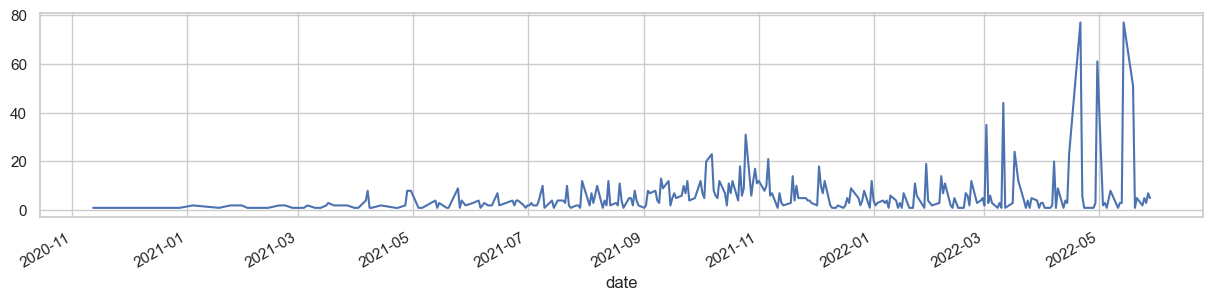

In [7]:
plt.figure(figsize=(15, 3))
df[df['sector'].isnull()].date.value_counts().sort_index().plot()
plt.show()

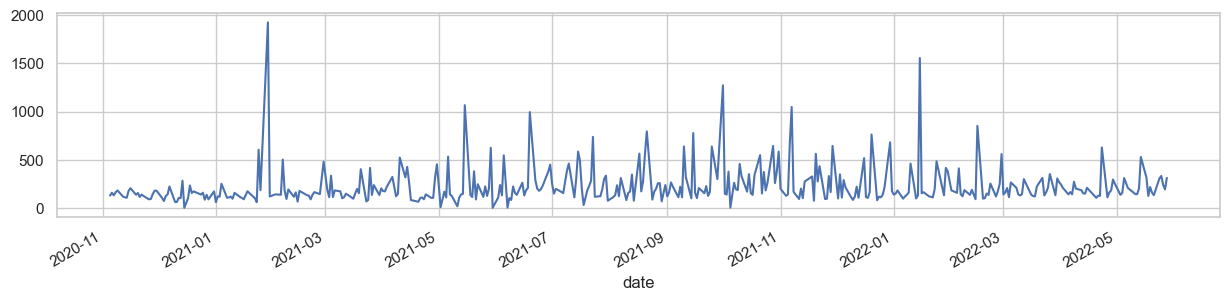

In [8]:
plt.figure(figsize=(15, 3))
df[~df['sector'].isnull()].date.value_counts().sort_index().plot()
plt.show()

In [ ]:
# se aprecia una valor faltante , que se podria conciderar como una categoria 
# hay sectores que tienen un % <1% se deberia analizar agrupar con algun otro similar por tasa de pago 

### fechas

In [40]:
df.head(2)

,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced
0,2022-05-28,2022-06-25,NaT,Ganadería,6,399091.0000
1,2022-05-28,2022-07-12,NaT,Consumo Basico,4,305235.0000


In [35]:
df['expirationDays'] = (df['expirationDate'] - df['date']).dt.days # dias de generacion hasta vencimiento
df['paymentDays'] = np.where(df['paymentDate'].isnull(),(pd.to_datetime('28-05-2022',format="%d-%m-%Y") - df['expirationDate']).dt.days, # fecha de corte "foto"
                             (df['paymentDate'] - df['expirationDate']).dt.days) # dias vencidos


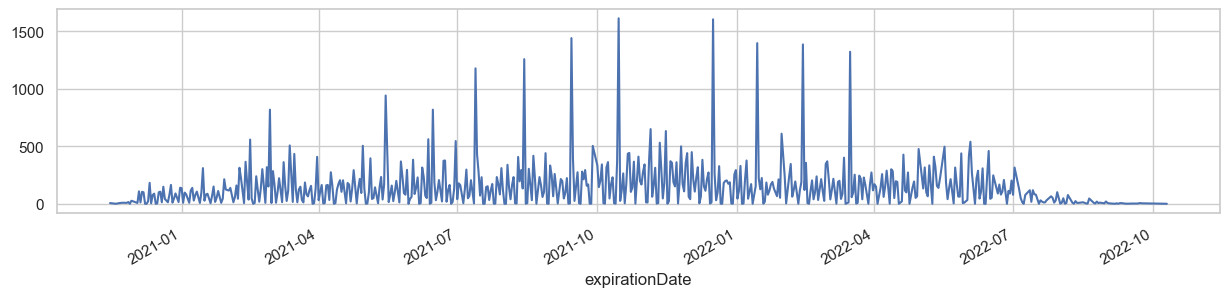

In [36]:
plt.figure(figsize=(15, 3))
df.expirationDate.value_counts().sort_index().plot()
plt.show()

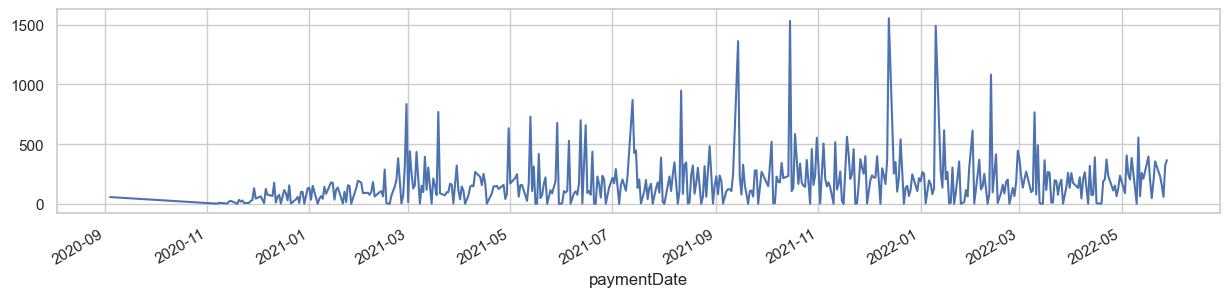

In [37]:
plt.figure(figsize=(15, 3))
df.paymentDate.value_counts().sort_index().plot()
plt.show()

In [48]:
df[['expirationDays','paymentDays']].describe(percentiles=[0.01,0.98,0.99]).T

,count,mean,std,min,1%,50%,98%,99%,max
expirationDays,92212.0000,40.5884,23.2694,-62.0000,8.0000,32.0000,100.0000,118.0000,191.0000
paymentDays,92212.0000,2.3530,35.4974,-369.0000,-62.0000,0.0000,88.0000,166.0000,481.0000


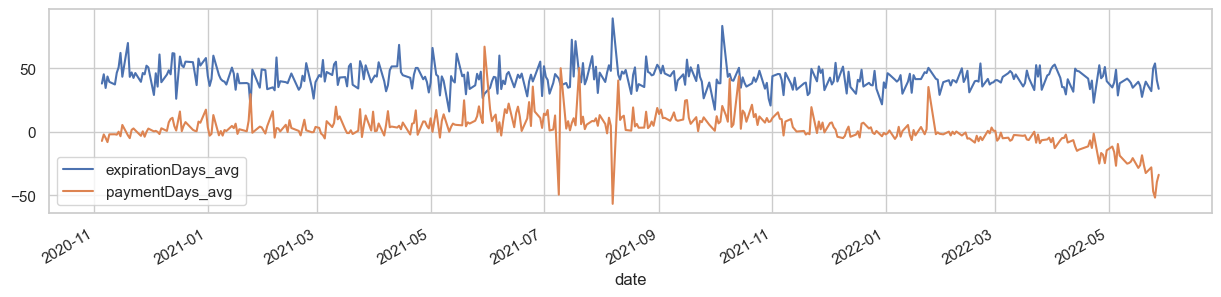

In [43]:
df.groupby('date').agg(
    expirationDays_avg=('expirationDays','mean'),
    paymentDays_avg=('paymentDays','mean'),
).plot(figsize=(15, 3))
plt.show()

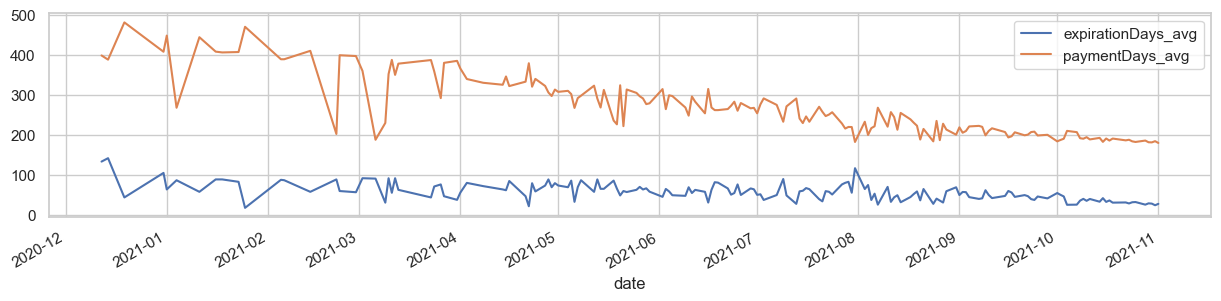

In [49]:
df[df["paymentDays"]>=180].groupby('date').agg(
    expirationDays_avg=('expirationDays','mean'),
    paymentDays_avg=('paymentDays','mean'),
).plot(figsize=(15, 3))
plt.show()

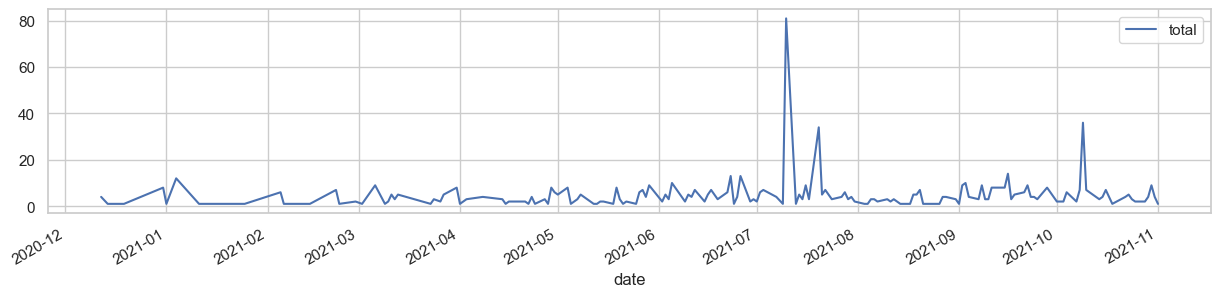

In [50]:
df[df["paymentDays"]>=180].groupby('date').agg(
    total=('expirationDays','size'),
).plot(figsize=(15, 3))
plt.show()

In [51]:
df['default']=np.where(df["paymentDays"]>=180,1,0)

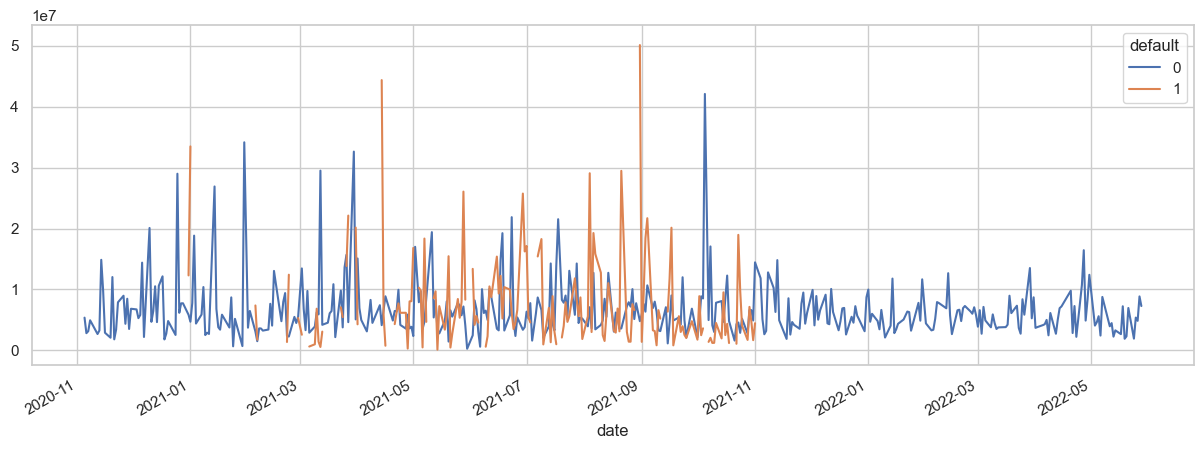

In [53]:
df.pivot_table(columns='default',
               index='date',
               values='amountFinanced',
               aggfunc='mean').plot(figsize=(15, 5))
plt.show()

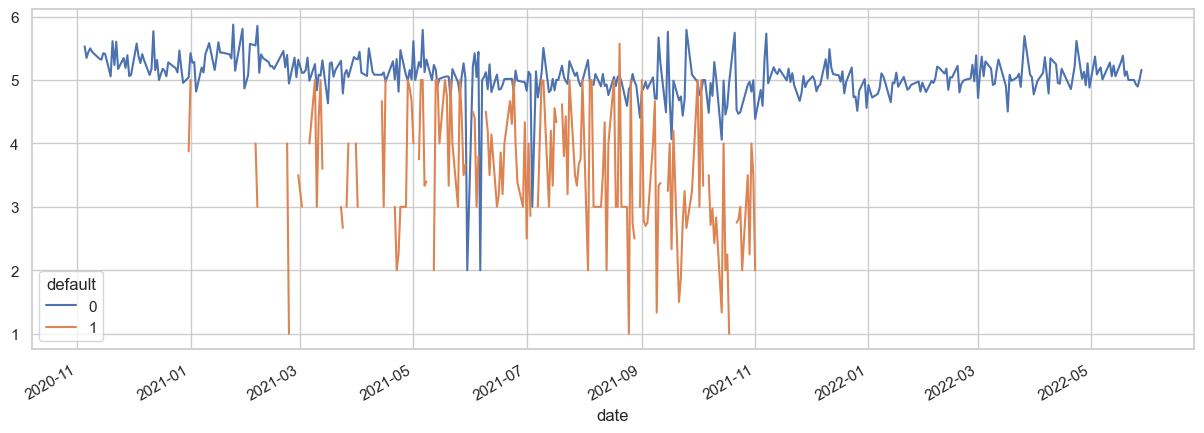

In [54]:
df.pivot_table(columns='default',
               index='date',
               values='payerSalesSegment',
               aggfunc='mean').plot(figsize=(15, 5))
plt.show()

In [ ]:
# Se observa que en promedio desde la generacion de la factura hasta el pago son de 40 dias
# Hay una fecha en el mes de 2021-07, esto puede explicarse porque fueron peridos de pandemia, seria como un rezago de la curentena
# Se observa hay una diferencia en payerSalesSegment con default y sin default, podria ser una variable importante


### Conclusiones del Análisis Exploratorio

1. **Datos faltantes:**
   - Las columnas `paymentDate`, `sector` y `amountFinanced` contienen valores nulos. 
   - En el caso de `sector`, los valores nulos podrían considerarse como una categoría propia, ya que representan una característica potencialmente relevante.

2. **Registros duplicados:**
   - Se identificaron registros duplicados. 
   - Tras un análisis, se concluyó que estos duplicados podrían representar múltiples facturas idénticas, lo que se considera un comportamiento normal en el negocio.

3. **Valores extremos:**
   - En la variable `payerSalesSegment`, por size los segmentos 5 y 6 presentan picos notables.

4. **Distribución de categorías en `sector`:**
   - Se detectaron sectores con una representación menor al 1% del total.
   - Se recomienda agrupar estos sectores con otros similares, posiblemente en función de su tasa de pago o características compartidas, para mejorar la estabilidad del análisis.

5. **Tiempos de pago:**
   - En promedio, desde la generación de una factura hasta su pago transcurren aproximadamente 40 días.
   - Este tiempo promedio podría utilizarse como referencia para identificar comportamientos inusuales.

6. **Impacto de la pandemia:**
   - Se identificó una anomalía temporal en julio de 2021, posiblemente asociada a los efectos rezagados de la pandemia y las restricciones de la cuarentena.

7. **Análisis de segmentación y default:**
   - Existe una diferencia notable en la distribución de la variable `payerSalesSegment` entre los registros con default y los sin default.
   - Esto indica que esta variable podría ser un factor importante para predecir el comportamiento de pago.